In [337]:
import re
import os
import time
import nltk
import pickle
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [338]:
from sklearn.model_selection import train_test_split

## LingFeat features

**allLingfeat.p** file is a dataframe of extracted lingFeat

In [339]:
allLingfeat_ = pickle.load(open('ExtractedDataSets/allLingfeat.p', 'rb'))
allLingfeat_

,to_EntiM_C,as_EntiM_C,at_EntiM_C,to_UEnti_C,as_UEnti_C,at_UEnti_C,ra_SSTo_C,ra_SOTo_C,ra_SXTo_C,ra_SNTo_C,...,as_Sylla_C,at_Sylla_C,as_Chara_C,at_Chara_C,FleschG_S,AutoRea_S,ColeLia_S,SmogInd_S,Gunning_S,LinseaW_S
0,1.0,0.5,0.250000,1.0,0.5,0.250000,0.0,0.0,0.0,0.0,...,2.0,1.000000,8.0,4.000000,2.890000,-1.910,-15.803568,1.414214,-0.50,0.00
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.5,1.000000,6.5,4.333333,-15.005000,-25.455,-15.804156,0.000000,-0.75,-0.25
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,2.5,1.250000,10.5,5.250000,-14.810000,-25.270,-15.803568,0.000000,-0.50,0.00
3,0.0,0.0,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,...,1.0,1.000000,3.5,3.500000,-15.200000,-25.640,-15.804744,0.000000,-1.00,-0.50
4,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,1.5,1.000000,6.0,4.000000,-15.005000,-25.455,-15.804156,0.000000,-0.75,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,1.0,0.5,0.333333,1.0,0.5,0.333333,0.0,0.0,0.0,0.0,...,1.0,0.666667,6.5,4.333333,-15.005000,-25.455,-15.804156,0.000000,-0.75,-0.25
4742,1.0,0.5,0.142857,1.0,0.5,0.142857,0.0,0.0,0.0,0.0,...,4.0,1.142857,14.0,4.000000,-0.739286,-1.355,-15.801804,1.414214,0.25,0.75
4743,0.0,0.0,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,...,0.0,0.000000,0.5,1.000000,-15.395000,-25.825,-15.805332,0.000000,-1.25,-0.75
4744,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,2.5,1.000000,8.0,3.200000,-2.815000,-6.397,-15.802980,1.000000,-0.25,0.25


In [340]:
# allLingfeat['class'] # not included
# allLingfeat['query'] # not included

### Remove DISCO features

The following feature are dropped because they are mostly used for paragraph and large text while search queries are usually single pheases and sentences

In [342]:
discoFeat = ['to_EntiM_C',
            'as_EntiM_C',
            'at_EntiM_C',
            'to_UEnti_C',
            'as_UEnti_C',
            'at_UEnti_C',
            'ra_SSToT_C',
            'ra_SOToT_C',
            'ra_SXToT_C',
            'ra_SNToT_C',
            'ra_OSToT_C',
            'ra_OOToT_C',
            'ra_OXToT_C',
            'ra_ONToT_C',
            'ra_XSToT_C',
            'ra_XOToT_C',
            'ra_XXToT_C',
            'ra_XNToT_C',
            'ra_NSToT_C',
            'ra_NOToT_C',
            'ra_NXToT_C',
            'ra_NNToT_C',
            'LoCohPA_S',
            'LoCohPW_S',
            'LoCohPU_S',
            'LoCoDPA_S',
            'LoCoDPW_S',
            'LoCoDPU_S']

In [343]:
allLingfeat = allLingfeat_.copy()
allLingfeat = allLingfeat.drop(discoFeat, axis=1)
allLingfeat.shape

(4746, 195)

## Spelling and Punctuation features

In [344]:
SPFeat = pickle.load(open('data/ExtractedDataSets/SPFeat.p','rb'))
SPFeat

,numSpellingErrors,query,offByOne,kidsError,punct,casing
0,0,US civil war causes,0,0,0,1
1,0,scooter brands,0,0,0,0
2,0,scooter brands reliable,0,0,0,0
3,0,scooter,0,0,0,0
4,0,scooter cheap,0,0,0,0
...,...,...,...,...,...,...
4741,0,House of dreams,0,0,0,1
4742,0,When did Desmond doss get married,0,0,0,1
4743,1,H,1,0,0,1
4744,0,find fact about dog,0,0,0,0


In [345]:
# SPFeat['class'] # not included
# SPFeat['query'] # included

#### drop ``query column`` 

In [346]:
SPFeat.drop(columns = ['query'], inplace = True, axis=1)

In [347]:
SPFeat

,numSpellingErrors,offByOne,kidsError,punct,casing
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4741,0,0,0,0,1
4742,0,0,0,0,1
4743,1,1,0,0,1
4744,0,0,0,0,0


## Other features

In [348]:
otherFeat = pickle.load(open('data/ExtractedDataSets/otherFeat.p','rb'))
otherFeat


,query,class,ratioAbs,ratioConc
0,US civil war causes,0,0.250000,0.250000
1,scooter brands,0,0.000000,0.500000
2,scooter brands reliable,0,0.333333,0.333333
3,scooter,0,0.000000,1.000000
4,scooter cheap,0,0.500000,0.500000
...,...,...,...,...
4741,House of dreams,1,0.333333,0.000000
4742,When did Desmond doss get married,1,0.500000,0.000000
4743,H,1,0.000000,0.000000
4744,find fact about dog,1,0.750000,0.250000


In [349]:
# otherFeat['class'] # included
# otherFeat['query'] # included

In [350]:
allFeatAdded_ = pd.concat([allLingfeat,
                           otherFeat,
                           SPFeat], 
                        axis = 1)
allFeatAdded_.reset_index(inplace = True, drop = True)
allFeatAdded_


,ra_SSTo_C,ra_SOTo_C,ra_SXTo_C,ra_SNTo_C,ra_OSTo_C,ra_OOTo_C,ra_OXTo_C,ra_ONTo_C,ra_XSTo_C,ra_XOTo_C,...,LinseaW_S,query,class,ratioAbs,ratioConc,numSpellingErrors,offByOne,kidsError,punct,casing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,US civil war causes,0,0.250000,0.250000,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,scooter brands,0,0.000000,0.500000,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,scooter brands reliable,0,0.333333,0.333333,0,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.50,scooter,0,0.000000,1.000000,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,scooter cheap,0,0.500000,0.500000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,House of dreams,1,0.333333,0.000000,0,0,0,0,1
4742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,When did Desmond doss get married,1,0.500000,0.000000,0,0,0,0,1
4743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.75,H,1,0.000000,0.000000,1,1,0,0,1
4744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,find fact about dog,1,0.750000,0.250000,0,0,0,0,0


### Check duplicate columns

In [351]:
cols = allFeatAdded_.columns.tolist()

In [352]:
len(cols) == len(set(cols))

True

## Make a dataframe copy

In [353]:
allFeatAdded = allFeatAdded_.copy()

## Replace NaN with 0

In [354]:
allFeatAdded = allFeatAdded.fillna(0)
allFeatAdded

,ra_SSTo_C,ra_SOTo_C,ra_SXTo_C,ra_SNTo_C,ra_OSTo_C,ra_OOTo_C,ra_OXTo_C,ra_ONTo_C,ra_XSTo_C,ra_XOTo_C,...,LinseaW_S,query,class,ratioAbs,ratioConc,numSpellingErrors,offByOne,kidsError,punct,casing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,US civil war causes,0,0.250000,0.250000,0,0,0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,scooter brands,0,0.000000,0.500000,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,scooter brands reliable,0,0.333333,0.333333,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.50,scooter,0,0.000000,1.000000,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,scooter cheap,0,0.500000,0.500000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.25,House of dreams,1,0.333333,0.000000,0,0,0,0,1
4742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,When did Desmond doss get married,1,0.500000,0.000000,0,0,0,0,1
4743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.75,H,1,0.000000,0.000000,1,1,0,0,1
4744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,find fact about dog,1,0.750000,0.250000,0,0,0,0,0


## Replace ``inf`` in ``avgLenWord column`` by 0

(4338 row)

In [355]:
allFeatAdded = allFeatAdded.replace('inf', 0)

In [356]:
inf = allFeatAdded[allFeatAdded.isin([np.inf, -np.inf]).any(axis=1)]

In [357]:
inf.head()

,ra_SSTo_C,ra_SOTo_C,ra_SXTo_C,ra_SNTo_C,ra_OSTo_C,ra_OOTo_C,ra_OXTo_C,ra_ONTo_C,ra_XSTo_C,ra_XOTo_C,...,LinseaW_S,query,class,ratioAbs,ratioConc,numSpellingErrors,offByOne,kidsError,punct,casing


In [358]:
# inf['avgLenWord']

In [359]:
# inf['avgLenWord'] = inf['avgLenWord'].replace('inf','0')
# print(inf)

## Count constant variables

In [360]:
constant_columns_count = 0

for column in allFeatAdded.columns:
    if allFeatAdded[column].nunique() == 1:
        constant_columns_count += 1

print("Number of constant columns:", constant_columns_count)

Number of constant columns: 9


## Count and print constant columns

In [362]:
constant_columns_count = 0

constant_columns = []

for column in allFeatAdded.columns:
    if allFeatAdded[column].nunique() == 1:
        constant_columns_count += 1
        constant_columns.append(column)

print("Number of constant columns:", constant_columns_count)
print("Constant column names:", constant_columns)


Number of constant columns: 9
Constant column names: ['ra_SSTo_C', 'ra_SOTo_C', 'ra_SXTo_C', 'ra_OSTo_C', 'ra_OOTo_C', 'ra_OXTo_C', 'ra_XSTo_C', 'ra_XOTo_C', 'ra_XXTo_C']


## Drop constant columns

In [363]:
constant_columns = []
for column in allFeatAdded.columns:
    if allFeatAdded[column].nunique() == 1:
        constant_columns.append(column)

allFeat_DroppedConstCols = pd.DataFrame(allFeatAdded.drop(columns=constant_columns))


In [364]:
allFeat_DroppedConstCols

,ra_SNTo_C,ra_ONTo_C,ra_XNTo_C,ra_NSTo_C,ra_NOTo_C,ra_NXTo_C,ra_NNTo_C,to_NoPhr_C,as_NoPhr_C,at_NoPhr_C,...,LinseaW_S,query,class,ratioAbs,ratioConc,numSpellingErrors,offByOne,kidsError,punct,casing
0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,1.0,0.5,0.250000,...,0.00,US civil war causes,0,0.250000,0.250000,0,0,0,0,1
1,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.000000,...,-0.25,scooter brands,0,0.000000,0.500000,0,0,0,0,0
2,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.00,scooter brands reliable,0,0.333333,0.333333,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.50,scooter,0,0.000000,1.000000,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.25,scooter cheap,0,0.500000,0.500000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.000000,...,-0.25,House of dreams,1,0.333333,0.000000,0,0,0,0,1
4742,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.142857,...,0.75,When did Desmond doss get married,1,0.500000,0.000000,0,0,0,0,1
4743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,-0.75,H,1,0.000000,0.000000,1,1,0,0,1
4744,0.0,0.0,0.0,0.0,0.5,0.0,0.5,3.0,1.5,0.600000,...,0.25,find fact about dog,1,0.750000,0.250000,0,0,0,0,0


In [365]:
allFeat_DroppedConstCols.shape

(4746, 195)

## Split the dataset into 90/10 

``expSet set`` represent the ``90%`` of the dataset that will be used in the experimenst, while ``pipSet set`` which is ``10%`` will be used for popiple line test

In [373]:
rng = 52023
X, y = allFeat_DroppedConstCols.drop('class', axis=1), allFeat_DroppedConstCols['class']
X_expSet, X_pipSet, y_expSet, y_pipSet = train_test_split(X, y, 
                                                    test_size=0.1, stratify=y,
                                                   random_state=rng)

In [376]:
# Add the class column back to experiment set
X_expSet['class'] = y_expSet
expSet = X_expSet
expSet.shape

(4271, 195)

In [377]:
# Add the class column back to pipeline test test
X_pipSet['class'] = y_pipSet
pipSet = X_pipSet
pipSet.shape

(475, 195)

## Export the final datasets

In [379]:
pickle.dump(expSet, open('data/ExtractedDataSets/allFeatFinal.p', 'wb'))
pickle.dump(pipSet, open('data/ExtractedDataSets/pipelineTestingSet.p', 'wb'))

In [450]:
pipSet['class'].value_counts(normalize = True)

0    0.8
1    0.2
Name: class, dtype: float64

# Data/features exploration

We are randomly selecting two columns for each feature category

In [382]:
data = expSet.copy()

## 1. Syntactic

Measuring the complexity of grammar and structure

**i. to_NoPhr_C** - total count of Noun phrases

*Google* A noun phrase is either a pronoun or any group of words that can be replaced by a pronoun. For example, 'they', 'cars', and 'the cars' are noun phrases, but 'car' is just a noun, as you can see in these sentences (in which the noun phrases are all in bold) Q: Do you like cars? A: Yes, I like them.

**ii. at_VePhr_C** - average count of Verb phrases per token

*Google*: A verb phrase or verbal phrase consists of a verb, or of a main verb following a modal or one or more auxiliaries. Examples are ` walked,' `can see,' and `had been waiting. '

In [383]:
data['to_NoPhr_C']

3101    0.0
4524    3.0
4441    3.0
186     0.0
3552    0.0
       ... 
4581    0.0
3647    0.0
4229    0.0
2388    0.0
2064    0.0
Name: to_NoPhr_C, Length: 4271, dtype: float64

In [384]:
data['at_VePhr_C']

3101    0.0
4524    0.0
4441    0.0
186     0.0
3552    0.0
       ... 
4581    0.0
3647    0.0
4229    0.0
2388    0.0
2064    0.0
Name: at_VePhr_C, Length: 4271, dtype: float64

In [385]:
synt2Feat = data[['to_NoPhr_C','at_VePhr_C', 'to_TreeH_C', 'class']]

In [386]:
# Rename columns

col_name = {'to_NoPhr_C': 'TotalNPCount',
           'at_VePhr_C': 'AvVerPharCount',
           'to_TreeH_C': 'TreeHeightCount'}
            
synt2Feat = synt2Feat.rename(columns = col_name)
synt2Feat.head()

,TotalNPCount,AvVerPharCount,TreeHeightCount,class
3101,0.0,0.0,0.0,0
4524,3.0,0.0,6.0,1
4441,3.0,0.0,6.0,1
186,0.0,0.0,0.0,0
3552,0.0,0.0,0.0,0


### Basic info

#### - All

In [387]:
synt2Feat.describe()

,TotalNPCount,AvVerPharCount,TreeHeightCount,class
count,4271.000000,4271.000000,4271.000000,4271.000000
mean,1.095762,0.063712,2.966987,0.199953
std,1.425252,0.133476,3.338805,0.400012
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,6.000000,0.000000
max,8.000000,1.000000,20.000000,1.000000


<AxesSubplot:>

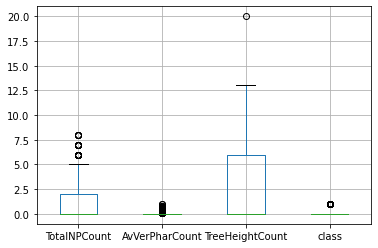

In [388]:
synt2Feat.boxplot()

<AxesSubplot:>

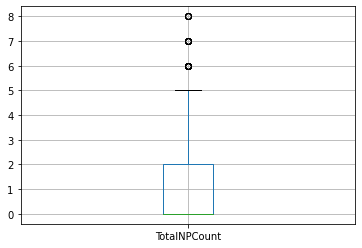

In [389]:
pd.DataFrame(synt2Feat['TotalNPCount']).boxplot()

<AxesSubplot:>

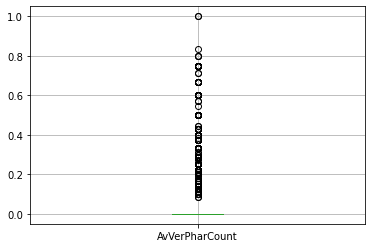

In [390]:
pd.DataFrame(synt2Feat['AvVerPharCount']).boxplot()

#### - Kids

In [391]:
Ksynt2Feat = synt2Feat[synt2Feat['class'] == 1]
Ksynt2Feat.describe()

,TotalNPCount,AvVerPharCount,TreeHeightCount,class
count,854.000000,854.000000,854.000000,854.0
mean,1.133489,0.077194,3.145199,1.0
std,1.521546,0.136445,3.723440,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,1.0
75%,2.000000,0.166667,7.000000,1.0
max,8.000000,0.750000,20.000000,1.0


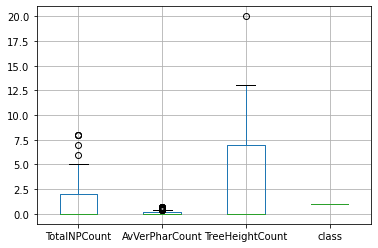

In [392]:
Ksynt2Feat.boxplot()
plt.show()

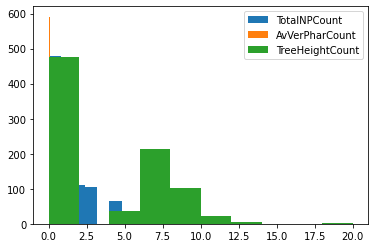

In [393]:
plt.hist(Ksynt2Feat['TotalNPCount'], label='TotalNPCount')
plt.hist(Ksynt2Feat['AvVerPharCount'], label='AvVerPharCount') 
plt.hist(Ksynt2Feat['TreeHeightCount'], label='TreeHeightCount')
plt.legend()
plt.show()

#### - Adults

In [394]:
Asynt2Feat = synt2Feat[synt2Feat['class'] == 0]
Asynt2Feat.describe()

,TotalNPCount,AvVerPharCount,TreeHeightCount,class
count,3417.000000,3417.000000,3417.000000,3417.0
mean,1.086333,0.060342,2.922447,0.0
std,1.400227,0.132530,3.234604,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,2.000000,0.000000,6.000000,0.0
max,8.000000,1.000000,13.000000,0.0


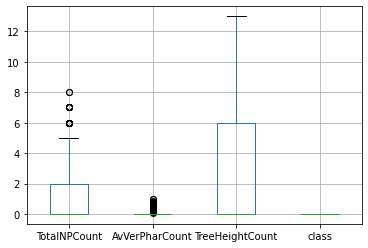

In [395]:
Asynt2Feat.boxplot()
plt.show()

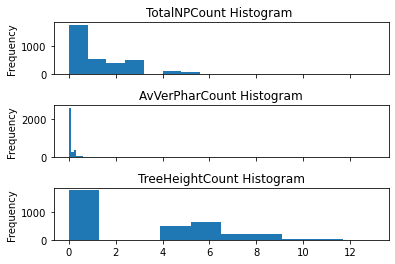

In [396]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.hist(Asynt2Feat['TotalNPCount'])
ax2.hist(Asynt2Feat['AvVerPharCount'])
ax3.hist(Asynt2Feat['TreeHeightCount'])

ax1.set_ylabel('Frequency')
ax1.set_title('TotalNPCount Histogram ')

ax2.set_ylabel('Frequency')
ax2.set_title('AvVerPharCount Histogram') 

ax3.set_ylabel('Frequency')
ax3.set_title('TreeHeightCount Histogram')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6)

plt.show()


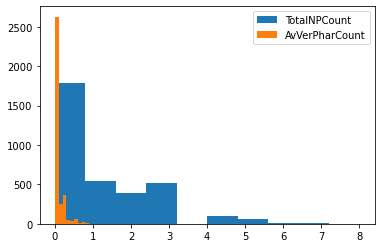

In [397]:
plt.hist(Asynt2Feat['TotalNPCount'], label='TotalNPCount')
plt.hist(Asynt2Feat['AvVerPharCount'], label='AvVerPharCount')
plt.legend()
plt.show()

From the above plots, we can see that in both classes, most of the observations contain 0 values in the selected features

## 2. Lexican Semantics

Measuring word/phrasal-specific difficulty

**i. SimpNoV_S** - unique Nouns/total Nouns (Noun Variation-1)

**ii. SimpTTR_S** - unique tokens/total tokens (TTR)

**iii. to_AAKuW_C** - total AoA (Age of Acquisition) of words. *Note: AoA refers to the estimated age at which a word is learned or acquired by individuals.*

In [398]:
lexSem3Feat = data[['SimpNoV_S', 'SimpTTR_S', 'to_AAKuW_C', 'class']]

#### - All

In [399]:
lexSem3Feat.describe()

,SimpNoV_S,SimpTTR_S,to_AAKuW_C,class
count,4271.000000,4271.000000,4271.000000,4271.000000
mean,0.844157,0.994661,17.170698,0.199953
std,0.360848,0.044707,11.534529,0.400012
min,0.000000,0.083333,0.000000,0.000000
25%,1.000000,1.000000,8.900000,0.000000
50%,1.000000,1.000000,16.200000,0.000000
75%,1.000000,1.000000,24.070000,0.000000
max,1.000000,1.000000,109.080000,1.000000


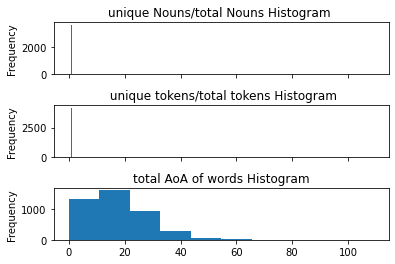

In [400]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.hist(lexSem3Feat['SimpNoV_S'])
ax2.hist(lexSem3Feat['SimpTTR_S'])
ax3.hist(lexSem3Feat['to_AAKuW_C'])

ax1.set_ylabel('Frequency')
ax1.set_title('unique Nouns/total Nouns Histogram ')

ax2.set_ylabel('Frequency')
ax2.set_title(' unique tokens/total tokens Histogram') 

ax3.set_ylabel('Frequency')
ax3.set_title('total AoA of words Histogram')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6)

plt.show()

<AxesSubplot:>

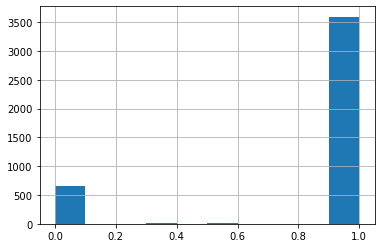

In [401]:
lexSem3Feat['SimpNoV_S'].hist()

<AxesSubplot:>

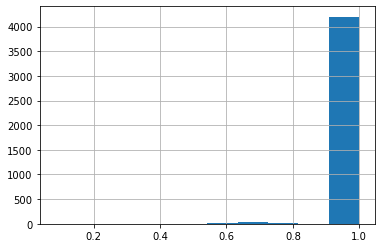

In [402]:
lexSem3Feat['SimpTTR_S'].hist()

<AxesSubplot:>

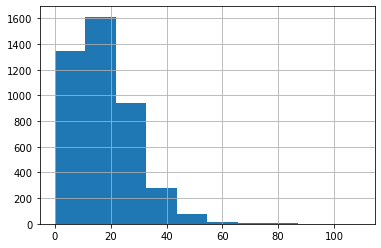

In [403]:
lexSem3Feat['to_AAKuW_C'].hist()

#### - Kids

In [404]:
KlexSem3Feat = lexSem3Feat[lexSem3Feat['class'] == 1]
KlexSem3Feat.describe()

,SimpNoV_S,SimpTTR_S,to_AAKuW_C,class
count,854.000000,854.000000,854.000000,854.0
mean,0.758308,0.987123,12.879204,1.0
std,0.427072,0.074020,10.977088,0.0
min,0.000000,0.083333,0.000000,1.0
25%,1.000000,1.000000,4.260000,1.0
50%,1.000000,1.000000,11.540000,1.0
75%,1.000000,1.000000,19.007500,1.0
max,1.000000,1.000000,83.870000,1.0


In [405]:
KlexSem3Feat.shape

(854, 4)

<AxesSubplot:>

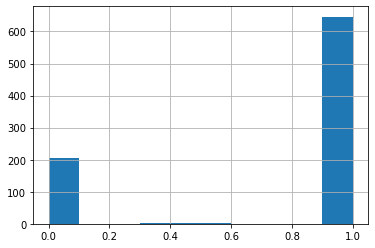

In [406]:
KlexSem3Feat['SimpNoV_S'].hist()

<AxesSubplot:>

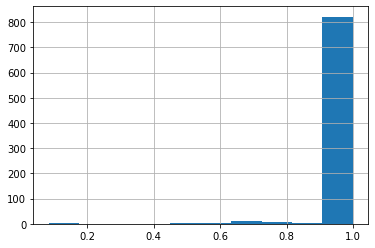

In [407]:
KlexSem3Feat['SimpTTR_S'].hist()

<AxesSubplot:>

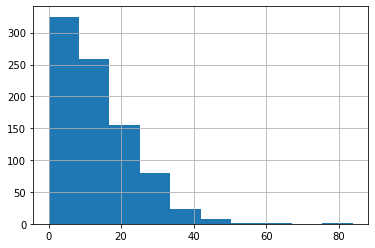

In [408]:
KlexSem3Feat['to_AAKuW_C'].hist()

#### - Adults 

In [409]:
AlexSem3Feat = lexSem3Feat[lexSem3Feat['class'] == 0]
AlexSem3Feat.describe()

,SimpNoV_S,SimpTTR_S,to_AAKuW_C,class
count,3417.000000,3417.000000,3417.000000,3417.0
mean,0.865613,0.996545,18.243257,0.0
std,0.338994,0.033355,11.422036,0.0
min,0.000000,0.428571,0.000000,0.0
25%,1.000000,1.000000,10.020000,0.0
50%,1.000000,1.000000,17.250000,0.0
75%,1.000000,1.000000,25.030000,0.0
max,1.000000,1.000000,109.080000,0.0


In [410]:
AlexSem3Feat.shape

(3417, 4)

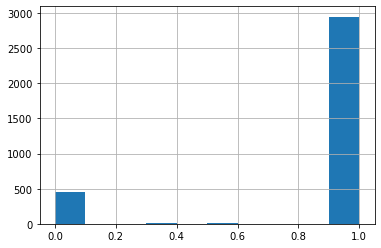

In [411]:
AlexSem3Feat['SimpNoV_S'].hist()
plt.show()

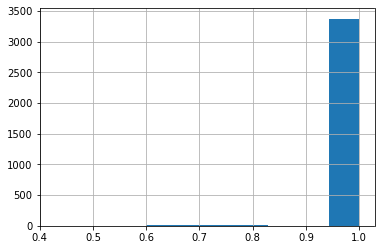

In [412]:
AlexSem3Feat['SimpTTR_S'].hist()
plt.show()

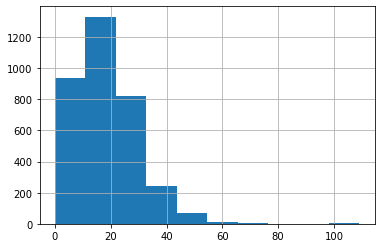

In [413]:
AlexSem3Feat['to_AAKuW_C'].hist()
plt.show()

## 3. Shallow Tradition

traditional features/formulas for text difficulty

**i. as_Token_C** - average count of tokens per sentence

**ii. as_Sylla_C** - average count of syllables per sentence

**iii. as_Chara_C** - average count of characters per sentence

In [414]:
shaTr3Feat = data[['as_Token_C', 'as_Sylla_C', 'as_Chara_C', 'class']]

#### - All

In [415]:
shaTr3Feat.describe()

,as_Token_C,as_Sylla_C,as_Chara_C,class
count,4271.000000,4271.000000,4271.000000,4271.000000
mean,2.161106,3.183778,10.893097,0.199953
std,0.811788,1.612997,5.253215,0.400012
min,0.500000,0.000000,0.000000,0.000000
25%,1.500000,2.000000,7.500000,0.000000
50%,2.000000,3.000000,10.500000,0.000000
75%,2.500000,4.000000,13.500000,0.000000
max,9.000000,16.500000,56.500000,1.000000


In [416]:
shaTr3Feat.shape

(4271, 4)

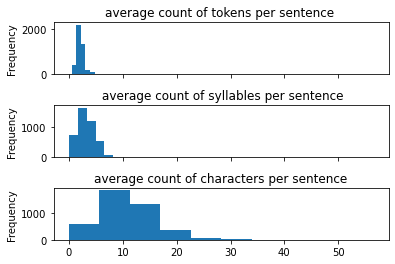

In [417]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.hist(shaTr3Feat['as_Token_C'])
ax2.hist(shaTr3Feat['as_Sylla_C'])
ax3.hist(shaTr3Feat['as_Chara_C'])

ax1.set_ylabel('Frequency')
ax1.set_title('average count of tokens per sentence ')

ax2.set_ylabel('Frequency')
ax2.set_title(' average count of syllables per sentence') 

ax3.set_ylabel('Frequency')
ax3.set_title('average count of characters per sentence')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6)

plt.show()

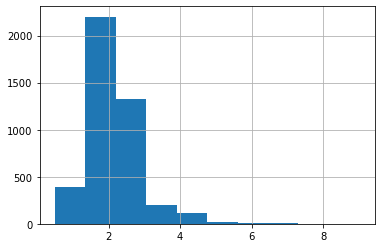

In [418]:
shaTr3Feat['as_Token_C'].hist()
plt.show()

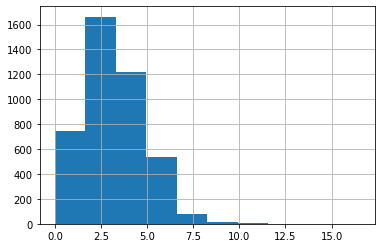

In [419]:
shaTr3Feat['as_Sylla_C'].hist()
plt.show()

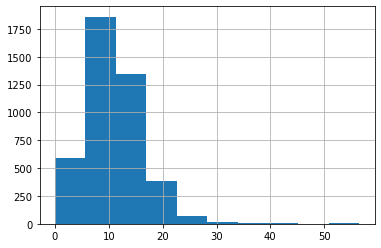

In [420]:
shaTr3Feat['as_Chara_C'].hist()
plt.show()

#### - Kids

In [421]:
KshaTr3Feat = shaTr3Feat[shaTr3Feat['class'] == 1]
KshaTr3Feat.describe()

,as_Token_C,as_Sylla_C,as_Chara_C,class
count,854.000000,854.000000,854.000000,854.0
mean,2.085773,2.481948,8.854508,1.0
std,1.053955,1.566990,5.778339,0.0
min,0.500000,0.000000,0.000000,1.0
25%,1.500000,1.000000,4.500000,1.0
50%,2.000000,2.500000,8.000000,1.0
75%,2.500000,3.500000,12.000000,1.0
max,8.500000,11.000000,56.500000,1.0


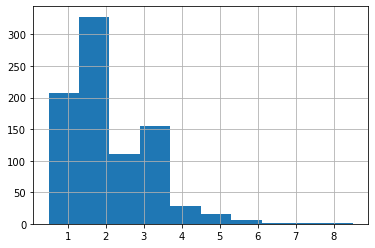

In [422]:
KshaTr3Feat['as_Token_C'].hist()
plt.show()

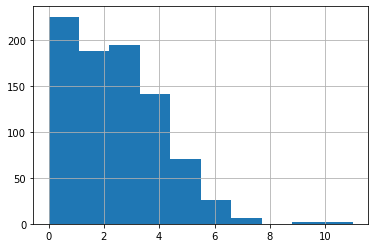

In [423]:
KshaTr3Feat['as_Sylla_C'].hist()
plt.show()

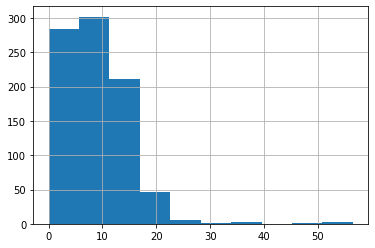

In [424]:
KshaTr3Feat['as_Chara_C'].hist()
plt.show()

#### - Agults

In [425]:
AshaTr3Feat = shaTr3Feat[shaTr3Feat['class'] == 0]
AshaTr3Feat.describe()

,as_Token_C,as_Sylla_C,as_Chara_C,class
count,3417.000000,3417.000000,3417.000000,3417.0
mean,2.179934,3.359184,11.402595,0.0
std,0.737968,1.576431,4.985899,0.0
min,0.500000,0.000000,1.000000,0.0
25%,1.500000,2.500000,8.000000,0.0
50%,2.000000,3.000000,10.500000,0.0
75%,2.500000,4.000000,14.000000,0.0
max,9.000000,16.500000,54.000000,0.0


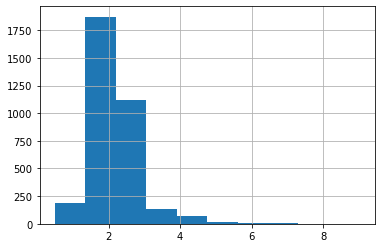

In [426]:
AshaTr3Feat['as_Token_C'].hist()
plt.show()

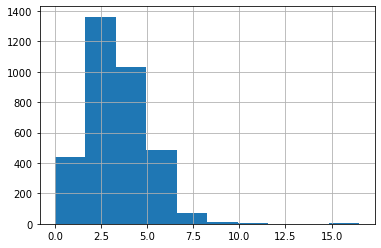

In [427]:
AshaTr3Feat['as_Sylla_C'].hist()
plt.show()

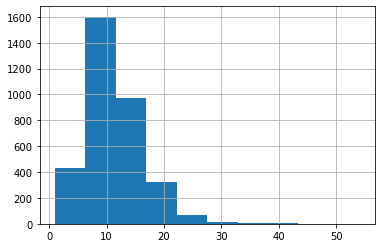

In [428]:
AshaTr3Feat['as_Chara_C'].hist()
plt.show()

## Spelling & Panctuation


In [429]:
SP2Feat = data[['offByOne', 'casing', 'class']]

#### - All 

In [430]:
SP2Feat.describe()

,offByOne,casing,class
count,4271.000000,4271.000000,4271.000000
mean,0.160150,0.354015,0.199953
std,0.582424,0.478270,0.400012
min,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,3.000000,1.000000,1.000000


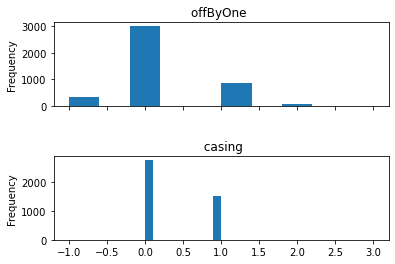

In [431]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.hist(SP2Feat['offByOne'])
ax2.hist(SP2Feat['casing'])

ax1.set_ylabel('Frequency')
ax1.set_title('offByOne ')

ax2.set_ylabel('Frequency')
ax2.set_title(' casing') 


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.6)

plt.show()

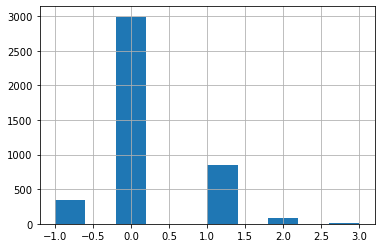

In [432]:
SP2Feat['offByOne'].hist()
plt.show()

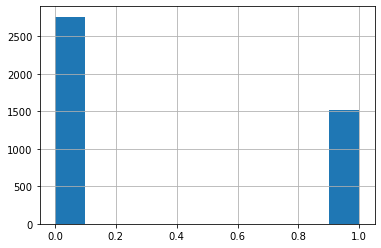

In [433]:
SP2Feat['casing'].hist()
plt.show()

#### - Kids

In [434]:
KSP2Feat = SP2Feat[SP2Feat['class'] == 1]
KSP2Feat.describe()

,offByOne,casing,class
count,854.000000,854.000000,854.0
mean,0.242389,0.478923,1.0
std,0.607520,0.499848,0.0
min,-1.000000,0.000000,1.0
25%,0.000000,0.000000,1.0
50%,0.000000,0.000000,1.0
75%,1.000000,1.000000,1.0
max,3.000000,1.000000,1.0


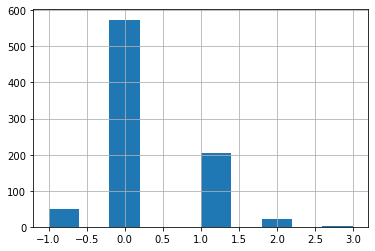

In [435]:
KSP2Feat['offByOne'].hist()
plt.show()

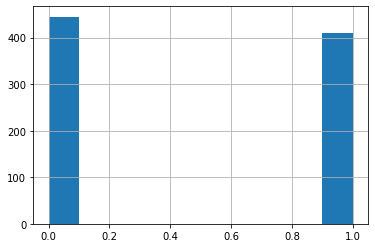

In [436]:
KSP2Feat['casing'].hist()
plt.show()

#### - Adults

In [437]:
ASP2Feat = SP2Feat[SP2Feat['class'] == 0]
ASP2Feat.describe()

,offByOne,casing,class
count,3417.000000,3417.000000,3417.0
mean,0.139596,0.322798,0.0
std,0.574235,0.467615,0.0
min,-1.000000,0.000000,0.0
25%,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.0
75%,0.000000,1.000000,0.0
max,3.000000,1.000000,0.0


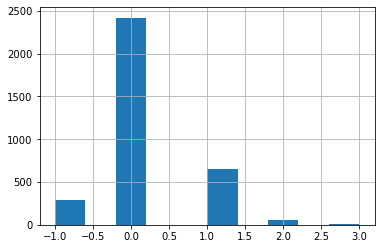

In [438]:
ASP2Feat['offByOne'].hist()
plt.show()

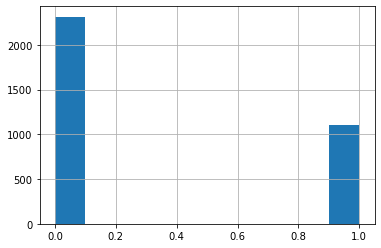

In [439]:
ASP2Feat['casing'].hist()
plt.show()

## 5. Concrete vs Abstract

In [440]:
conAbsFeat = data[['ratioAbs', 'ratioConc', 'class']]
conAbsFeat.describe()

,ratioAbs,ratioConc,class
count,4271.000000,4271.000000,4271.000000
mean,0.247809,0.272027,0.199953
std,0.254582,0.275194,0.400012
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.250000,0.250000,0.000000
75%,0.428571,0.500000,0.000000
max,1.000000,1.000000,1.000000


#### - All 

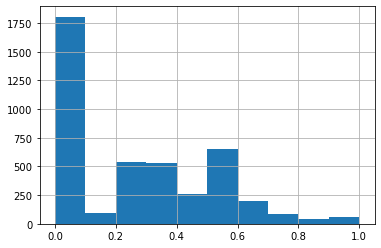

In [441]:
conAbsFeat['ratioAbs'].hist()
plt.show()

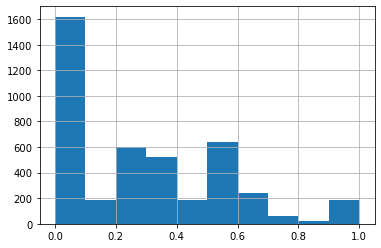

In [442]:
conAbsFeat['ratioConc'].hist()
plt.show()

#### - Kids

In [443]:
KconAbsFeat = conAbsFeat[conAbsFeat['class'] == 1]
KconAbsFeat.describe()

,ratioAbs,ratioConc,class
count,854.000000,854.000000,854.0
mean,0.251919,0.228271,1.0
std,0.271255,0.282928,0.0
min,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.0
50%,0.200000,0.142857,1.0
75%,0.500000,0.333333,1.0
max,1.000000,1.000000,1.0


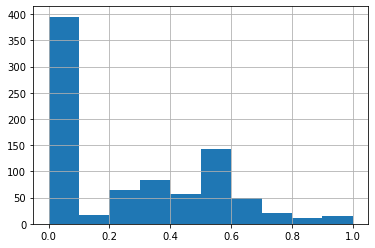

In [444]:
KconAbsFeat['ratioAbs'].hist()
plt.show()

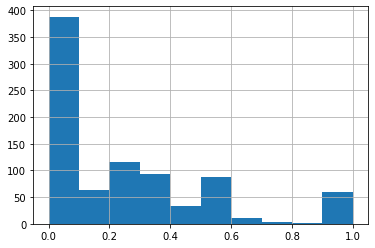

In [445]:
KconAbsFeat['ratioConc'].hist()
plt.show()

#### - Adults 

In [446]:
AconAbsFeat = conAbsFeat[conAbsFeat['class'] == 0]
AconAbsFeat.describe()

,ratioAbs,ratioConc,class
count,3417.000000,3417.000000,3417.0
mean,0.246781,0.282963,0.0
std,0.250272,0.272173,0.0
min,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0
50%,0.250000,0.250000,0.0
75%,0.400000,0.500000,0.0
max,1.000000,1.000000,0.0


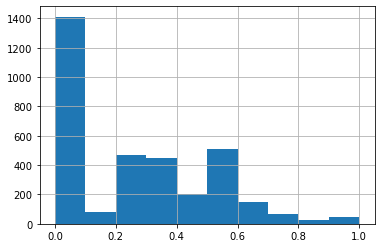

In [447]:
AconAbsFeat['ratioAbs'].hist()
plt.show()

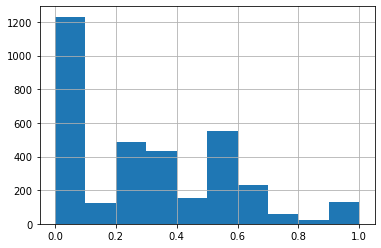

In [448]:
AconAbsFeat['ratioConc'].hist()
plt.show()